## Part 1: Building the CNN

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [11]:
import tensorflow as tf
tf.__version__

'2.9.0'

**Importing the Keras libraries**

In [2]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

**Initializing the CNN**

In [3]:
classifier = Sequential()

Metal device set to: Apple M2 Pro


2024-04-23 11:42:41.679413: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-23 11:42:41.679931: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


**Step 1: Convolution**

In [4]:
classifier.add(Conv2D(32,(3,3), input_shape=(64,64,3),activation = 'relu'))

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D

**Step 2: Pooling**

In [5]:
classifier.add(MaxPooling2D(pool_size=(2,2)))

**Adding a second convolutional layer**

In [6]:
classifier.add(Conv2D(32,(3,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

**Step 3: Flattening**

In [7]:
classifier.add(Flatten())

**Step 4: Full connection**

In [8]:
classifier.add(Dense(units= 128, activation = 'relu'))
classifier.add(Dense(units=1, activation = 'sigmoid'))

**Compiling the CNN**

In [9]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8


## Part 2: Fitting the CNN to the images

**Data generator and fit to the data**

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_set = train_datagen.flow_from_directory(
        '/Users/MacBook/Documents/ISI/DL ISI/2_CNN_ImageClassification/dataset/training_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')
test_set = test_datagen.flow_from_directory(
        '/Users/MacBook/Documents/ISI/DL ISI/2_CNN_ImageClassification/dataset/test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 8030 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [13]:
history = classifier.fit(train_set,steps_per_epoch=250,epochs=25,validation_data=test_set,validation_steps=63)

Epoch 1/25


2024-04-23 06:47:10.240823: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-04-23 06:47:10.407571: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x32x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be

 42/250 [====>.........................] - ETA: 10s - loss: 0.7197 - accuracy: 0.5223

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x30x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x30x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceSh

250/250 [==============================] - ETA: 0s - loss: 0.6841 - accuracy: 0.5700

2024-04-23 06:47:25.746664: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x32x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x32x1x1xi1>'


250/250 [==============================] - 18s 64ms/step - loss: 0.6841 - accuracy: 0.5700 - val_loss: 0.6494 - val_accuracy: 0.6600
Epoch 2/25
  2/250 [..............................] - ETA: 12s - loss: 0.6688 - accuracy: 0.5625

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x16x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x16x1x1xi1>'


250/250 [==============================] - 13s 54ms/step - loss: 0.6157 - accuracy: 0.6609 - val_loss: 0.5695 - val_accuracy: 0.7190
Epoch 3/25
250/250 [==============================] - 13s 54ms/step - loss: 0.5660 - accuracy: 0.7046 - val_loss: 0.5436 - val_accuracy: 0.7365
Epoch 4/25
250/250 [==============================] - 13s 54ms/step - loss: 0.5382 - accuracy: 0.7293 - val_loss: 0.5706 - val_accuracy: 0.7095
Epoch 5/25
250/250 [==============================] - 13s 54ms/step - loss: 0.5103 - accuracy: 0.7492 - val_loss: 0.5345 - val_accuracy: 0.7375
Epoch 6/25
250/250 [==============================] - 14s 54ms/step - loss: 0.4940 - accuracy: 0.7557 - val_loss: 0.4862 - val_accuracy: 0.7755
Epoch 7/25
250/250 [==============================] - 14s 54ms/step - loss: 0.4684 - accuracy: 0.7793 - val_loss: 0.5966 - val_accuracy: 0.7320
Epoch 8/25
250/250 [==============================] - 14s 54ms/step - loss: 0.4550 - accuracy: 0.7863 - val_loss: 0.5050 - val_accuracy: 0.7630
Epo

**Metrics visualization**

In [14]:
import matplotlib.pyplot as plt

In [15]:
training_loss = history.history['loss']
test_loss = history.history['val_loss']

In [16]:
epoch_count = range(1, len(training_loss)+1)

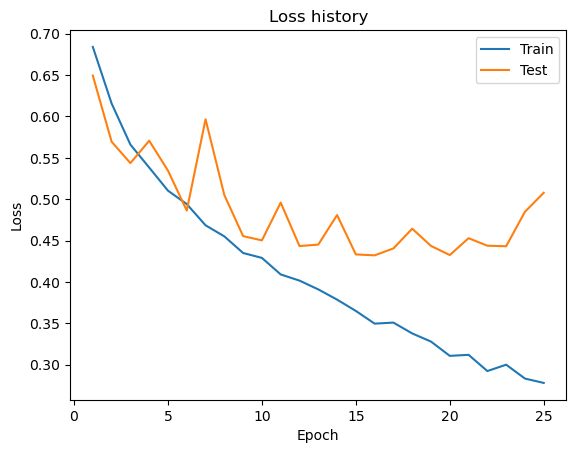

In [17]:
plt.plot(epoch_count, training_loss)
plt.plot(epoch_count, test_loss)
plt.title('Loss history')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])

In [18]:
training_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

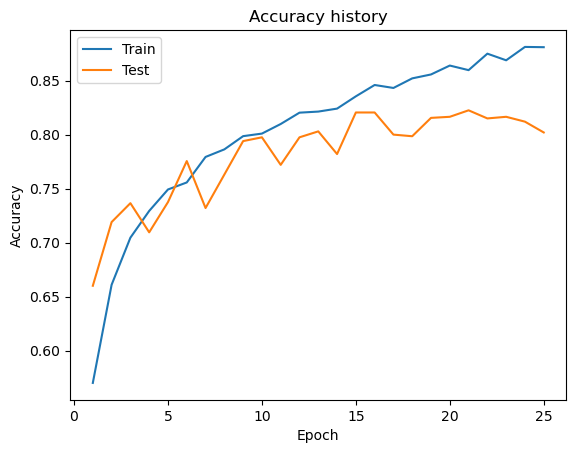

In [19]:
plt.plot(epoch_count, training_acc)
plt.plot(epoch_count, test_acc)
plt.title('Accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])

## Part 3: Making new predictions

In [12]:
import numpy as np
#from keras.preprocessing import image
from keras.utils import load_img, img_to_array
test_image = load_img('/Users/MacBook/Documents/ISI/DL ISI/2_CNN_ImageClassification/dataset/single_prediction/cat_or_dog_1.jpg', target_size=(64,64))

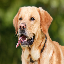

In [13]:
test_image

In [14]:
test_image = img_to_array(test_image)
test_image /= 255

In [15]:
test_image.shape

(64, 64, 3)

In [16]:
test_image

array([[[0.21176471, 0.22745098, 0.02745098],
        [0.22745098, 0.24705882, 0.03529412],
        [0.2509804 , 0.2627451 , 0.03921569],
        ...,
        [0.53333336, 0.5647059 , 0.2784314 ],
        [0.54901963, 0.5882353 , 0.3019608 ],
        [0.54509807, 0.58431375, 0.30588236]],

       [[0.1882353 , 0.21176471, 0.02352941],
        [0.2       , 0.22745098, 0.02745098],
        [0.22745098, 0.24705882, 0.03529412],
        ...,
        [0.5058824 , 0.5372549 , 0.2509804 ],
        [0.54509807, 0.58431375, 0.30588236],
        [0.5529412 , 0.5921569 , 0.3137255 ]],

       [[0.1882353 , 0.21960784, 0.02745098],
        [0.1882353 , 0.21960784, 0.02745098],
        [0.21176471, 0.23921569, 0.03921569],
        ...,
        [0.48235294, 0.50980395, 0.24705882],
        [0.53333336, 0.5686275 , 0.3137255 ],
        [0.54901963, 0.58431375, 0.32156864]],

       ...,

       [[0.18039216, 0.21568628, 0.04705882],
        [0.16470589, 0.19607843, 0.03529412],
        [0.14901961, 0

In [17]:
test_image = np.expand_dims(test_image,axis=0)
test_image.shape

(1, 64, 64, 3)

In [29]:
result = classifier.predict(test_image)

2024-04-23 06:56:42.211895: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 503ms/step


In [30]:
result = result[0][0]>0.5

In [31]:
if result == True:
    prediction = 'dog'
else:
    prediction = 'cat'

print(prediction)

dog
